In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/smart-broker-main (2)/smart-broker-main/notebooks

/content/drive/MyDrive/smart-broker-main (2)/smart-broker-main/notebooks


In [ ]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.a2c import A2C
from networks.a2c.actor import Actor
from networks.a2c.critic import Critic

import matplotlib.pyplot as plt
import torch

norm_cols = ['Volume XRP']
cols = ['date'] + ['open', 'high', 'low', 'close', f'Volume XRP']
batch_dur = 15
n_features = 4

env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-03-01',
        'end_date': '2021-05-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

actor_model = Actor(
    state_dim=batch_dur*n_features+3,
    action_dim=3,
)
critic_model = Critic(state_dim=batch_dur*n_features+3)
a2c = A2C(
    env=env, 
    actor=actor_model,
    critic=critic_model,
    n_actns=3,
    actor_optmz=torch.optim.Adam(actor_model.parameters(), lr=0.0008),
    critic_optmz=torch.optim.Adam(critic_model.parameters(), lr=0.0005),
    hyprprms={
        'gamma': 0.9995,
    },
    log_freq=1,
    mdl_pth='../models/a2c_nn_3',
    load_models=False,
)

In [ ]:
a2c.run(1000)


Ep: 0 | TS: 59970 | L: 3.275 | R: -6.72 | P: 40.93 | R.Avg P: 40.93 | NW: 140.93 | R.Avg NW: 140.93 | R.U: 206
Ep: 1 | TS: 119940 | L: 2.167 | R: -32.02 | P: -15.4 | R.Avg P: 12.76 | NW: 84.6 | R.Avg NW: 112.76 | R.U: 174
Ep: 2 | TS: 179910 | L: 1.328 | R: -24.65 | P: 11.88 | R.Avg P: 12.47 | NW: 111.88 | R.Avg NW: 112.47 | R.U: 174
Ep: 3 | TS: 239880 | L: 0.854 | R: -35.53 | P: -3.16 | R.Avg P: 8.56 | NW: 96.84 | R.Avg NW: 108.56 | R.U: 167
Ep: 4 | TS: 299850 | L: 0.649 | R: -41.67 | P: -13.79 | R.Avg P: 4.09 | NW: 86.21 | R.Avg NW: 104.09 | R.U: 160
Ep: 5 | TS: 359820 | L: 0.609 | R: -27.44 | P: 20.92 | R.Avg P: 6.9 | NW: 120.92 | R.Avg NW: 106.9 | R.U: 164
Ep: 6 | TS: 419790 | L: 0.663 | R: -34.96 | P: 11.62 | R.Avg P: 7.57 | NW: 111.62 | R.Avg NW: 107.57 | R.U: 162
Ep: 7 | TS: 479760 | L: 0.703 | R: -48.41 | P: -6.38 | R.Avg P: 5.83 | NW: 93.62 | R.Avg NW: 105.83 | R.U: 157
Ep: 8 | TS: 539730 | L: 0.713 | R: -43.12 | P: 14.53 | R.Avg P: 6.79 | NW: 114.53 | R.Avg NW: 106.79 | R.U: 

KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


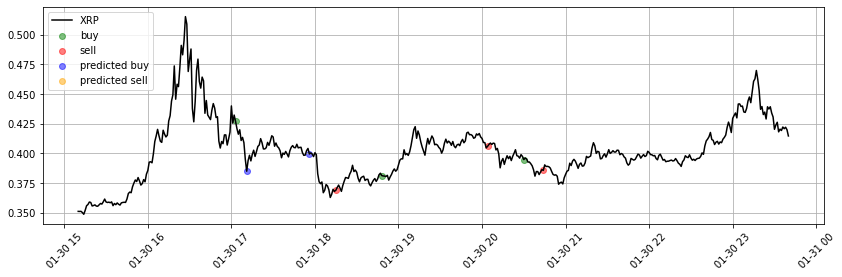

Avg.Rewards: -69.59 | Max.Profit: 0.0 | Avg.Profit: -7.27 | Avg.Units: 74 


In [ ]:
rewards, profits, actions = a2c.evaluate(start_dt='2021-01-30 15:15', duration=500, show_pred=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


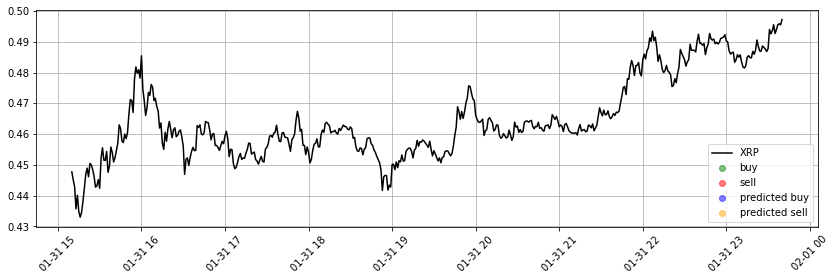

Avg.Rewards: -100.0 | Max.Profit: 0.0 | Avg.Profit: 0.0 | Avg.Units: 0 


In [ ]:
rewards, profits, actions = a2c.evaluate(start_dt='2021-01-31 15:15', duration=500, show_pred=True)

## Visualizations

### Training 

Text(0.5, 1.0, 'Rolling avg balance per episode')

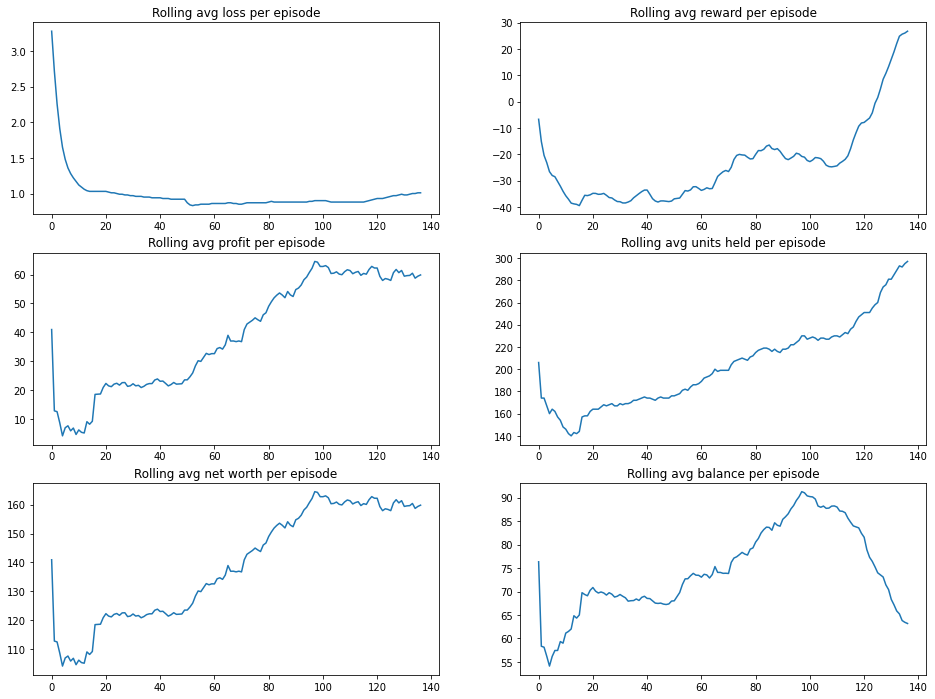

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in a2c.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

In [ ]:
# torch.save(a2c.actor.state_dict(), '../models/a2c_nn_3/actor')
# torch.save(a2c.critic.state_dict(), '../models/a2c_nn_3/critic')

In [ ]:
# import pickle
# with open("../pickles/a2c_logs_main.pickle","wb") as f:
#     temp = dict(a2c.logs)
#     pickle.dump(temp, f, pickle.HIGHEST_PROTOCOL)